In [1]:
using Revise, Plots, LinearAlgebra, LaTeXStrings, Random, Plots.Measures

In [2]:
includet("../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [3]:
domain  = [[0, 1], [0, 1]]

2-element Vector{Vector{Int64}}:
 [0, 1]
 [0, 1]

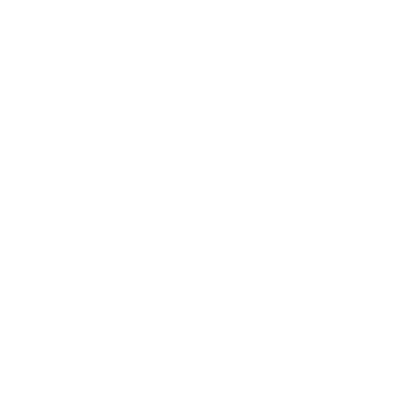

In [4]:
# Define the plot
num_points = 20

plt_grid_x1 = [domain[1][1] + i * (domain[1][2] - domain[1][1]) / num_points for j in 0:num_points, i in 0:num_points]
plt_grid_x2 = [domain[2][1] + j * (domain[2][2] - domain[2][1]) / num_points for j in 0:num_points, i in 0:num_points]

grid = range(0, stop=1, length=(num_points + 1))
plot_size = (400, 400) .* 2
plt = heatmap(xlims=domain[1], ylims=domain[2],
legend=:none, grid=false, ticks=:none, ratio=:equal,
    cb=:none, size=(400, 400), margins=-2mm, frame=:none)

In [5]:
ops = gaussian_operators_2D(0.08, plt_grid_x1, plt_grid_x2)

Operators(var"#ϕ#32"{Int64}(Core.Box(var"#gauss2D#31"{Float64, Vector{Float64}, Vector{Float64}, Matrix{Float64}, Float64}(0.06216989964527163, [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45  …  0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.05; … ; 1.0 0.95; 1.0 1.0], 78.125)), 441), var"#Φ#33"{var"#ϕ#32"{Int64}, Int64}(var"#ϕ#32"{Int64}(Core.Box(var"#gauss2D#31"{Float64, Vector{Float64}, Vector{Float64}, Matrix{Float64}, Float64}(0.06216989964527163, [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45  …  0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.05; … ; 1.0 0.95; 1.0 1.0], 78.125)), 441), Core.Box(var"#gauss2D#31"{Float64, Vector{Flo

## Pre-certificate

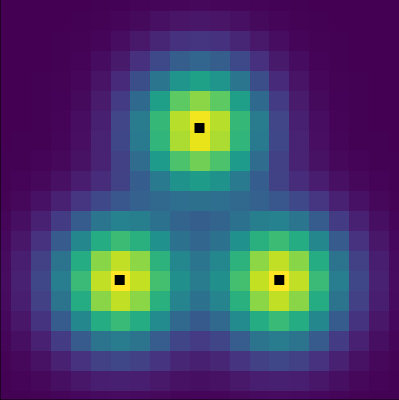

In [210]:
x0 = [[0.3, 0.5, 0.7], [0.3, 0.68, 0.3]]
a0 = [1.0, 1.0, 1.0]

μ0 = DiscreteMeasure(x0, a0)

ηV = pre_certificate(μ0, ops)

plt_cert = deepcopy(plt)

heatmap!(plt_cert, grid, grid, ηV, color=:viridis)
plot_spikes!(plt_cert, μ0, label=L"μ_0", marker=:square)

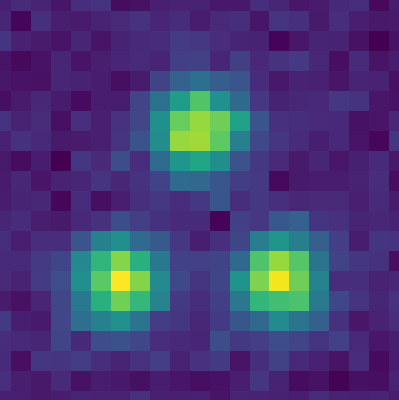

In [211]:
y0 = ops.Φ(μ0...)

function add_noise(y0, noise_level)
    sigma = noise_level * norm(y0)
    w = randn(length(y0))
    w = w / norm(w) * sigma
    y = y0 + w
    return y
end

# Add noise to the observation y = y0 + w
noise_level = 0.2
y = add_noise(y0, noise_level)
δ = noise_level * norm(y)

plt_obs = deepcopy(plt)

heatmap!(plt_obs, grid, grid, reshape(y, size(plt_grid_x1)), color=:viridis)
# plot_spikes!(plt_obs, μ0, label=L"μ_0", marker=:square, markersize=5, markerstrokewidth=1)

In [212]:
prob = BLASSO(y, ops, domain)

BLASSO([-0.000561013307119057, 0.00310277638744917, 0.0021451023651367306, 0.002622231326626895, 0.005861850401611416, -0.0014638144535348131, 0.0018828929966392912, 0.0019608908992153336, 0.0029513040604742685, 0.0010107969389270925  …  -0.00443443388460314, -0.00197809619018882, 0.004790009054616447, 0.0012861455870542891, -0.0031188195210107217, -0.0036286037137777173, -0.0012685159292200492, -0.00364571083517422, -0.0016774834181669423, -0.0010380072769015686], Operators(var"#ϕ#32"{Int64}(Core.Box(var"#gauss2D#31"{Float64, Vector{Float64}, Vector{Float64}, Matrix{Float64}, Float64}(0.06216989964527163, [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45  …  0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.05; … ; 1.0 0.95; 1.0 1.0], 78.125)), 441), var"#Φ#33"{var"#ϕ#32"{Int64}, Int64}(var"#ϕ#32"{Int64}(Core.Box(va

In [ ]:
plt_cert_behav = deepcopy(plt_obs)

solve!(prob, :MDP, options=Dict(:maxits => 10, :δ => δ, :τ => 1.1, :q => 0.8))

λ : 0.031946256205494676
  0.002534 seconds (3.48 k allocations: 1.578 MiB)
r : 0.31851764717065445
τδ: 0.07009313507557775
μ : DiscreteMeasure([[0.7006055493477994], [0.30463905528683816]], [0.0008722838580863534], 2, 1)
λ : 0.02555700496439574
  0.014998 seconds (8.09 k allocations: 2.993 MiB, 81.55% gc time)
r : 0.2578692643791181
τδ: 0.07009313507557775
μ : DiscreteMeasure([[0.7006055493477994, 0.29845542727370783, 0.49759868710558636], [0.30463905528683816, 0.29873463070739564, 0.6785255491043143]], [0.20588145232268018, 0.1989177105406048, 0.20469847347105197], 2, 3)
λ : 0.020445603971516596
  0.000562 seconds (2.59 k allocations: 910.495 KiB)
r : 0.20941575241444202
τδ: 0.07009313507557775
μ : DiscreteMeasure([[0.7006055493477994, 0.29845542727370783, 0.49759868710558636], [0.30463905528683816, 0.29873463070739564, 0.6785255491043143]], [0.36987964507003207, 0.36293085530607566, 0.368867920392941], 2, 3)
λ : 0.016356483177213277
  0.004153 seconds (8.44 k allocations: 4.385 MiB)

BLASSO([-0.000561013307119057, 0.00310277638744917, 0.0021451023651367306, 0.002622231326626895, 0.005861850401611416, -0.0014638144535348131, 0.0018828929966392912, 0.0019608908992153336, 0.0029513040604742685, 0.0010107969389270925  …  -0.00443443388460314, -0.00197809619018882, 0.004790009054616447, 0.0012861455870542891, -0.0031188195210107217, -0.0036286037137777173, -0.0012685159292200492, -0.00364571083517422, -0.0016774834181669423, -0.0010380072769015686], Operators(var"#ϕ#32"{Int64}(Core.Box(var"#gauss2D#31"{Float64, Vector{Float64}, Vector{Float64}, Matrix{Float64}, Float64}(0.06216989964527163, [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45  …  0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.05; … ; 1.0 0.95; 1.0 1.0], 78.125)), 441), var"#Φ#33"{var"#ϕ#32"{Int64}, Int64}(var"#ϕ#32"{Int64}(Core.Box(va

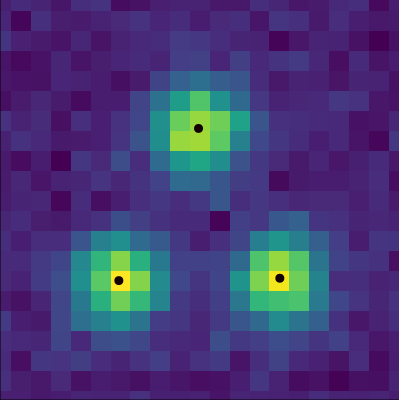

In [ ]:
plot_spikes!(plt_cert_behav, prob.μ, label=L"\hat{μ}", marker=:circle)